In [12]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import handytools.visualizer as vis
import spectools.models.models as mdl
from spectools.models.calc import get_RF
from spectools.stimulus.wyeth import get_stimulus
from spectools.responses import get_response_wrapper, get_drr_wrapper
from spectools.metrics.metrics import responsive
from spectools.models.models import AN_layer, VGG16b_layer, ResNet18_layer

In [14]:
def get_prs(R_fills, R_outlines, hkeys, verbose=False):
    prs = {}
    respdic = {}
    for hkey in hkeys:
        R_fill = R_fills[hkey]
        R_outline = R_outlines[hkey]

        prs[hkey] = np.array([])
        respdic[hkey] = []
        
        for unit in range(R_fill.shape[0]):
            resp = responsive(R_fill[unit]) and responsive(R_outline[unit])
            if resp:
                pr = np.corrcoef(R_fill[unit], R_outline[unit])[0][1]
                prs[hkey] = np.append(prs[hkey], pr)
                respdic[hkey].append(int(unit))
            else:
                prs[hkey] = np.append(prs[hkey], np.nan)
                if verbose: print(f"Layer {hkey}, unit {unit} not responsive!")
    return prs, respdic

# Fill-Outline Invariance (FOI) for different networks

In [15]:
# params
xn = 227
sz = 50
lw = 1.5
fg = 1.0
bg = 0.0

## For AlexNet

In [16]:
# params
hkeys = list(AN_layer.keys())
mtype = "AN"

# fill stimulus
fill = get_stimulus(1, xn=xn, sz=sz, lw=lw, fg=fg, bg=bg)
fname = lambda hkey: f"hkey={hkey}_fill=1_xn={xn}_sz={sz}_lw={lw}_fg={fg}_bg={bg}.npy"
R_fills = get_response_wrapper(hkeys, fill, fname, mtype=mtype)

# outline stimulus
outline = get_stimulus(0, xn=xn, sz=sz, lw=lw, fg=fg, bg=bg)
fname = lambda hkey: f"hkey={hkey}_fill=0_xn={xn}_sz={sz}_lw={lw}_fg={fg}_bg={bg}.npy"
R_outlines = get_response_wrapper(hkeys, outline, fname, mtype=mtype)

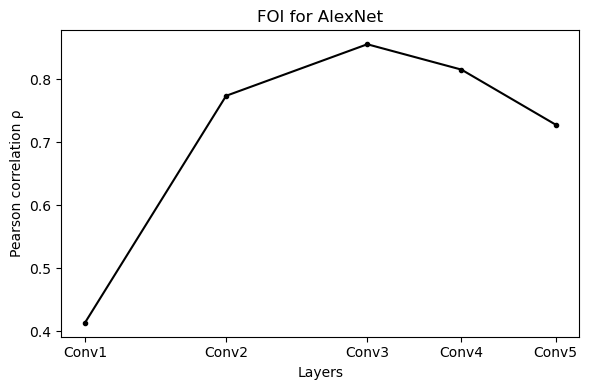

In [17]:
prs_an_foi, resp = get_prs(R_fills, R_outlines, hkeys)
res = [prs_an_foi[hkey][resp[hkey]].mean() for hkey in hkeys]

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(hkeys, res, color="k", marker=".", linestyle="-")
ax.set_xticks(hkeys)
ax.set_xticklabels([AN_layer[hkey] for hkey in  hkeys])
ax.set_xlabel("Layers"); ax.set_ylabel("Pearson correlation \u03C1"); ax.set_title("FOI for AlexNet")
plt.tight_layout(); plt.show()

## For VGG16

In [18]:
# params
hkeys = list(VGG16b_layer.keys())
mtype = "VGG16b"

# fill stimulus
fill = get_stimulus(1, xn=xn, sz=sz, lw=lw, fg=fg, bg=bg)
fname = lambda hkey: f"hkey={hkey}_fill=1_xn={xn}_sz={sz}_lw={lw}_fg={fg}_bg={bg}.npy"
R_fills = get_response_wrapper(hkeys, fill, fname, mtype=mtype)

# outline stimulus
outline = get_stimulus(0, xn=xn, sz=sz, lw=lw, fg=fg, bg=bg)
fname = lambda hkey: f"hkey={hkey}_fill=0_xn={xn}_sz={sz}_lw={lw}_fg={fg}_bg={bg}.npy"
R_outlines = get_response_wrapper(hkeys, outline, fname, mtype=mtype)

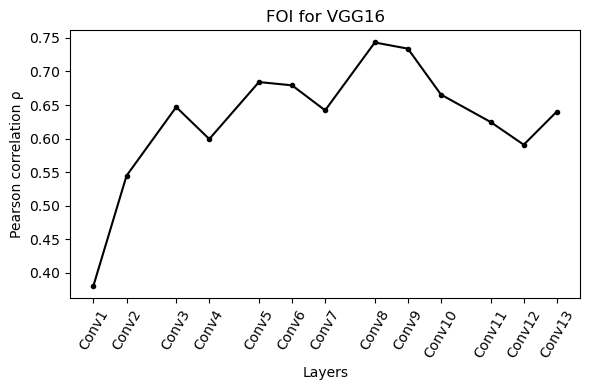

In [19]:
prs_vgg16_foi, resp = get_prs(R_fills, R_outlines, hkeys)
res = [prs_vgg16_foi[hkey][resp[hkey]].mean() for hkey in hkeys]

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(hkeys, res, color="k", marker=".", linestyle="-")
ax.set_xticks(hkeys)
ax.set_xticklabels([VGG16b_layer[hkey] for hkey in  hkeys], rotation=60)
ax.set_xlabel("Layers"); ax.set_ylabel("Pearson correlation \u03C1"); ax.set_title("FOI for VGG16")
plt.tight_layout(); plt.show()

## For ResNet18

In [20]:
# params
hkeys = list(ResNet18_layer.keys())
mtype = "ResNet18"

# fill stimulus
fill = get_stimulus(1, xn=xn, sz=sz, lw=lw, fg=fg, bg=bg)
fname = lambda hkey: f"hkey={hkey}_fill=1_xn={xn}_sz={sz}_lw={lw}_fg={fg}_bg={bg}.npy"
R_fills = get_response_wrapper(hkeys, fill, fname, mtype=mtype)

# outline stimulus
outline = get_stimulus(0, xn=xn, sz=sz, lw=lw, fg=fg, bg=bg)
fname = lambda hkey: f"hkey={hkey}_fill=0_xn={xn}_sz={sz}_lw={lw}_fg={fg}_bg={bg}.npy"
R_outlines = get_response_wrapper(hkeys, outline, fname, mtype=mtype)

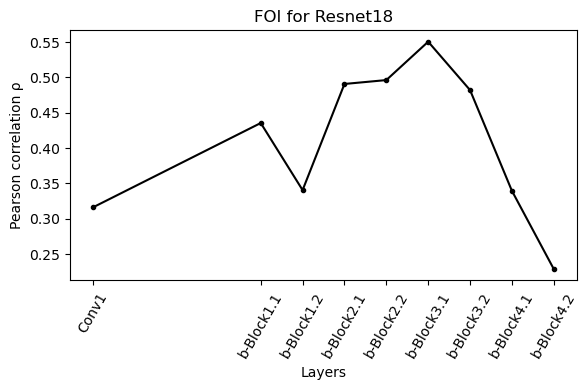

In [21]:
prs_resnet18_foi, resp = get_prs(R_fills, R_outlines, hkeys)
res = [prs_resnet18_foi[hkey][resp[hkey]].mean() for hkey in hkeys]

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(hkeys, res, color="k", marker=".", linestyle="-")
ax.set_xticks(hkeys)
ax.set_xticklabels([ResNet18_layer[hkey] for hkey in  hkeys], rotation=60)
ax.set_xlabel("Layers"); ax.set_ylabel("Pearson correlation \u03C1"); ax.set_title("FOI for Resnet18")
plt.tight_layout(); plt.show()

# On-Off Invariance (OOI) for different networks

In [22]:
# params
xn = 227
sz = 50
lw = 1.5
bg = 0.0
fillflag = 1

verbose = False

## For AlexNet

In [23]:
# params
hkeys = list(AN_layer.keys())
mtype = "AN"

# fill stimulus
onstim = get_stimulus(fillflag, xn=xn, sz=sz, lw=lw, fg=1.0, bg=bg)
fname = lambda hkey: f"hkey={hkey}_fill=1_xn={xn}_sz={sz}_lw={lw}_fg=1.0_bg={bg}.npy"
R_ons = get_response_wrapper(hkeys, onstim, fname, mtype=mtype)

# outline stimulus
offstim = get_stimulus(fillflag, xn=xn, sz=sz, lw=lw, fg=-1.0, bg=bg)
fname = lambda hkey: f"hkey={hkey}_fill=1_xn={xn}_sz={sz}_lw={lw}_fg=-1.0_bg={bg}.npy"
R_offs = get_response_wrapper(hkeys, offstim, fname, mtype=mtype)

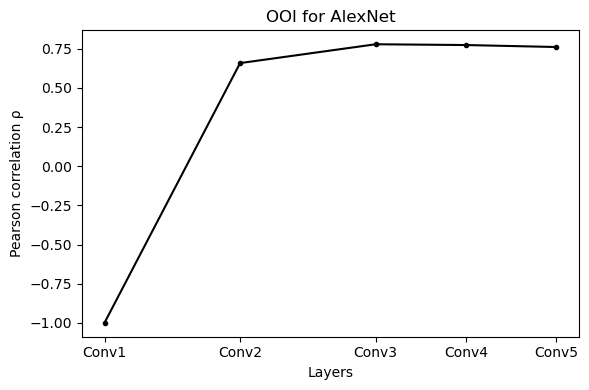

In [24]:
prs_an_ooi, resp = get_prs(R_ons, R_offs, hkeys)
res = [prs_an_ooi[hkey][resp[hkey]].mean() for hkey in hkeys]

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(hkeys, res, color="k", marker=".", linestyle="-")
ax.set_xticks(hkeys)
ax.set_xticklabels([AN_layer[hkey] for hkey in  hkeys])
ax.set_xlabel("Layers"); ax.set_ylabel("Pearson correlation \u03C1"); ax.set_title("OOI for AlexNet")
plt.tight_layout(); plt.show()

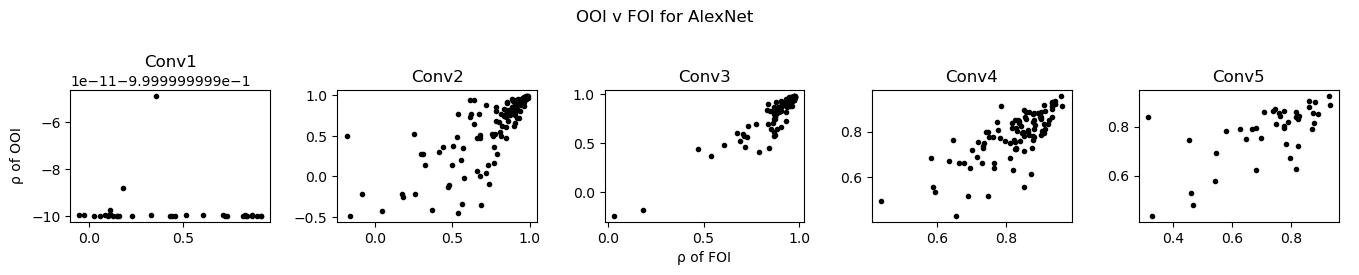

In [25]:
fig = plt.figure(figsize=(len(hkeys)*3 - 1, 3))
for i in range(len(hkeys)):
    hkey = hkeys[i]
    ax = fig.add_subplot(1, len(hkeys), i+1)
    ax.plot(prs_an_foi[hkey][resp[hkey]], prs_an_ooi[hkey][resp[hkey]], "k.")
    ax.set_title(AN_layer[hkey])
vis.common_label(fig, "\u03C1 of FOI", "\u03C1 of OOI")
plt.suptitle("OOI v FOI for AlexNet")
plt.tight_layout(); plt.show()

## For VGG16

In [26]:
# params
hkeys = list(VGG16b_layer.keys())
mtype = "VGG16b"

# fill stimulus
onstim = get_stimulus(fillflag, xn=xn, sz=sz, lw=lw, fg=1.0, bg=bg)
fname = lambda hkey: f"hkey={hkey}_fill=1_xn={xn}_sz={sz}_lw={lw}_fg=1.0_bg={bg}.npy"
R_ons = get_response_wrapper(hkeys, onstim, fname, mtype=mtype)

# outline stimulus
offstim = get_stimulus(fillflag, xn=xn, sz=sz, lw=lw, fg=-1.0, bg=bg)
fname = lambda hkey: f"hkey={hkey}_fill=1_xn={xn}_sz={sz}_lw={lw}_fg=-1.0_bg={bg}.npy"
R_offs = get_response_wrapper(hkeys, offstim, fname, mtype=mtype)

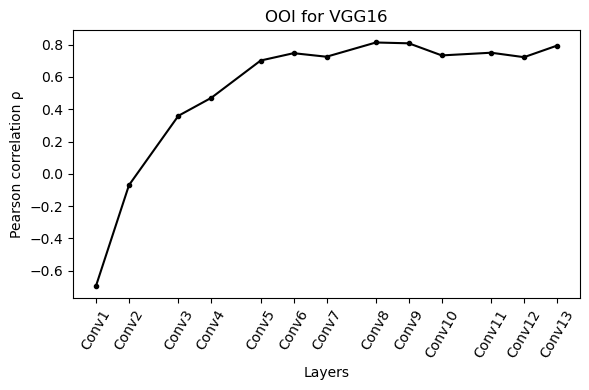

In [27]:
prs_vgg16_ooi, resp = get_prs(R_ons, R_offs, hkeys)
res = [prs_vgg16_ooi[hkey][resp[hkey]].mean() for hkey in hkeys]

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(hkeys, res, color="k", marker=".", linestyle="-")
ax.set_xticks(hkeys)
ax.set_xticklabels([VGG16b_layer[hkey] for hkey in  hkeys], rotation=60)
ax.set_xlabel("Layers"); ax.set_ylabel("Pearson correlation \u03C1"); ax.set_title("OOI for VGG16")
plt.tight_layout(); plt.show()

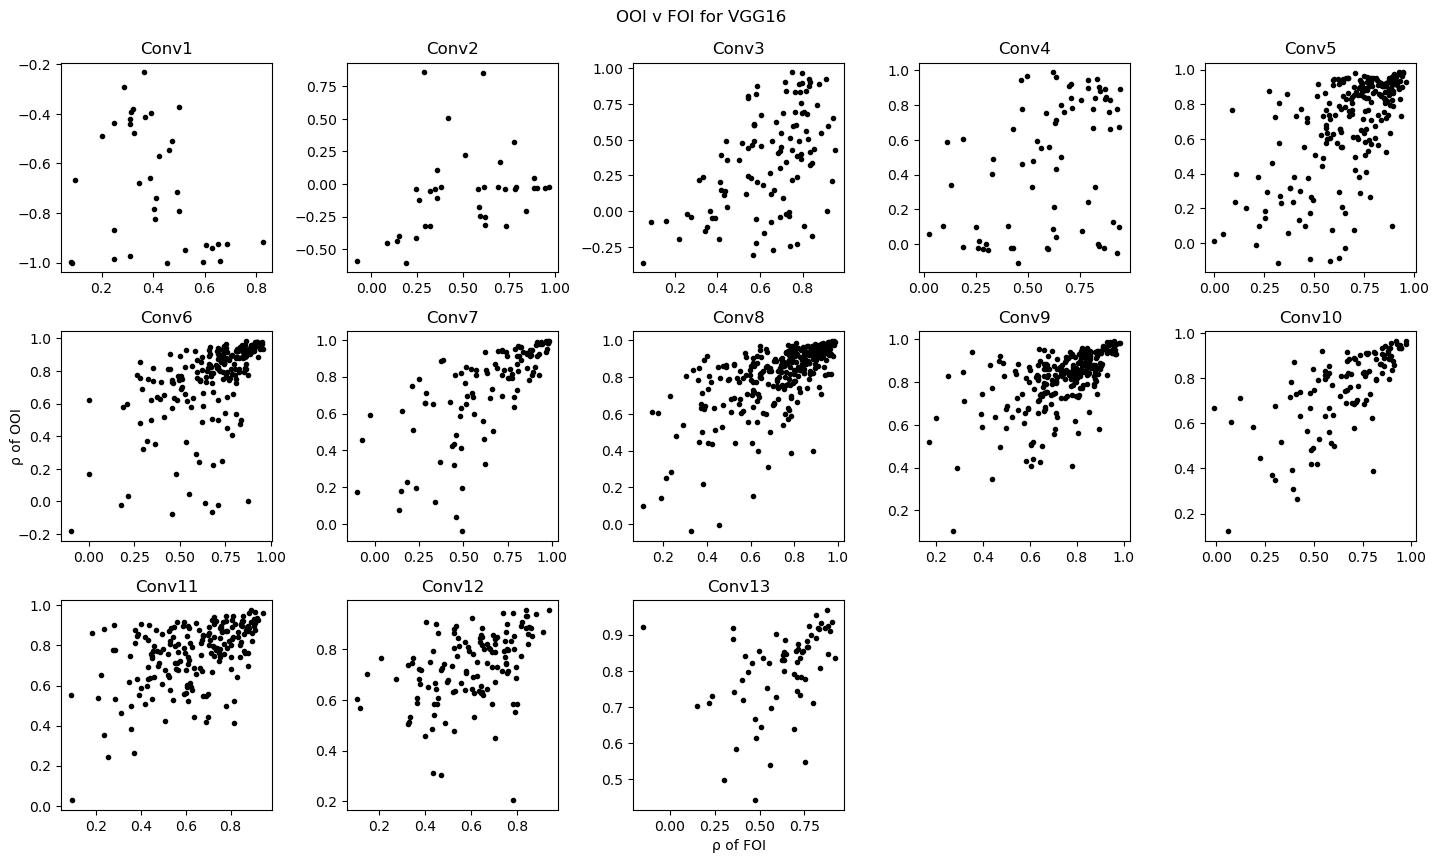

In [28]:
fig = plt.figure(figsize=(5*3, 3*3))
for i in range(len(hkeys)):
    hkey = hkeys[i]
    ax = fig.add_subplot(3, 5, i+1)
    ax.plot(prs_vgg16_foi[hkey], prs_vgg16_ooi[hkey], "k.")
    ax.set_title(VGG16b_layer[hkey])
vis.common_label(fig, "\u03C1 of FOI", "\u03C1 of OOI")
plt.suptitle("OOI v FOI for VGG16")
plt.tight_layout(); plt.show()

## For ResNet18

In [29]:
# params
hkeys = list(ResNet18_layer.keys())
mtype = "ResNet18"

# fill stimulus
onstim = get_stimulus(fillflag, xn=xn, sz=sz, lw=lw, fg=1.0, bg=bg)
fname = lambda hkey: f"hkey={hkey}_fill=1_xn={xn}_sz={sz}_lw={lw}_fg=1.0_bg={bg}.npy"
R_ons = get_response_wrapper(hkeys, onstim, fname, mtype=mtype)

# outline stimulus
offstim = get_stimulus(fillflag, xn=xn, sz=sz, lw=lw, fg=-1.0, bg=bg)
fname = lambda hkey: f"hkey={hkey}_fill=1_xn={xn}_sz={sz}_lw={lw}_fg=-1.0_bg={bg}.npy"
R_offs = get_response_wrapper(hkeys, offstim, fname, mtype=mtype)

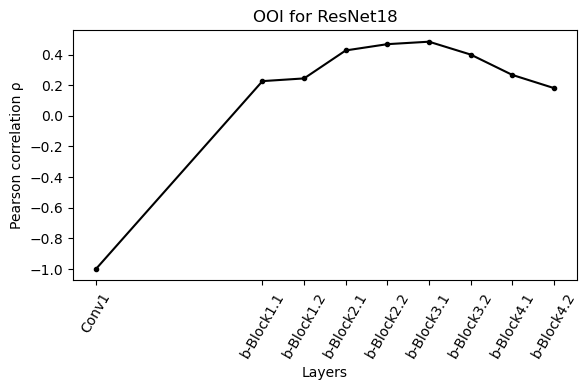

In [30]:
prs_resnet18_ooi, resp = get_prs(R_ons, R_offs, hkeys)
res = [prs_resnet18_ooi[hkey][resp[hkey]].mean() for hkey in hkeys]

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(hkeys, res, color="k", marker=".", linestyle="-")
ax.set_xticks(hkeys)
ax.set_xticklabels([ResNet18_layer[hkey] for hkey in  hkeys], rotation=60)
ax.set_xlabel("Layers"); ax.set_ylabel("Pearson correlation \u03C1"); ax.set_title("OOI for ResNet18")
plt.tight_layout(); plt.show()

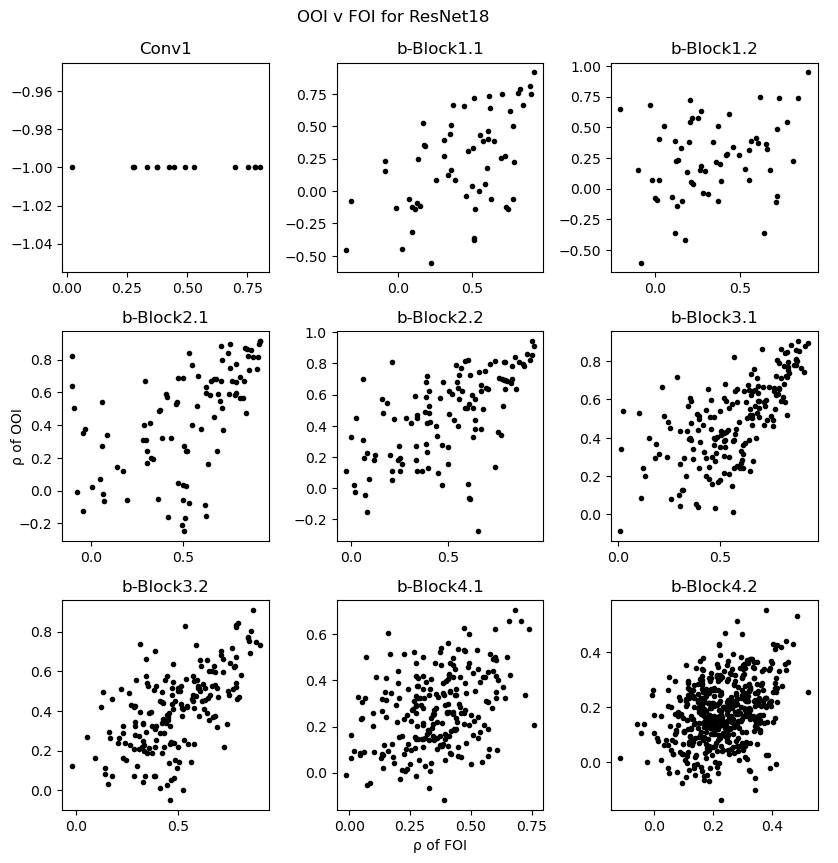

In [31]:
fig = plt.figure(figsize=(3*3, 3*3))
for i in range(len(hkeys)):
    hkey = hkeys[i]
    ax = fig.add_subplot(3, 3, i+1)
    ax.plot(prs_resnet18_foi[hkey], prs_resnet18_ooi[hkey], "k.")
    ax.set_title(ResNet18_layer[hkey])
vis.common_label(fig, "\u03C1 of FOI", "\u03C1 of OOI")
plt.suptitle("OOI v FOI for ResNet18")
plt.tight_layout(); plt.show()

# FOI v Receptive Field for different networks

In [32]:
def get_prs_wrap(mtype, hkeys):
    xn, sz, lw, fg, bg = 227, 50, 1.5, 1.0, 0.0

    # fill stimulus
    fill = get_stimulus(1, xn=xn, sz=sz, lw=lw, fg=fg, bg=bg)
    fname = lambda hkey: f"hkey={hkey}_fill=1_xn={xn}_sz={sz}_lw={lw}_fg={fg}_bg={bg}.npy"
    R_fills = get_response_wrapper(hkeys, fill, fname, mtype=mtype)

    # outline stimulus
    outline = get_stimulus(0, xn=xn, sz=sz, lw=lw, fg=fg, bg=bg)
    fname = lambda hkey: f"hkey={hkey}_fill=0_xn={xn}_sz={sz}_lw={lw}_fg={fg}_bg={bg}.npy"
    R_outlines = get_response_wrapper(hkeys, outline, fname, mtype=mtype)

    prs, resp = get_prs(R_fills, R_outlines, hkeys)
    return prs, resp

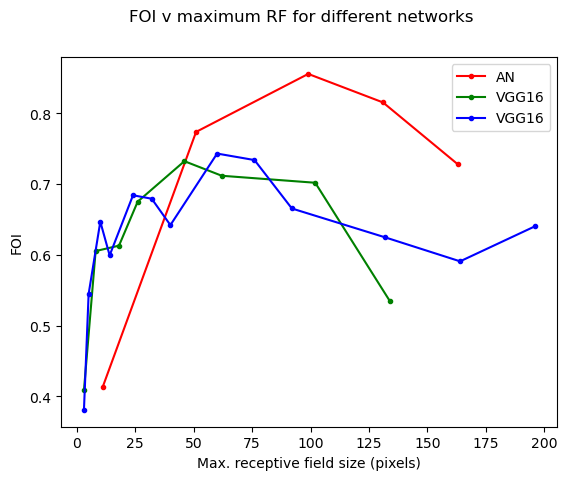

In [33]:
device = "cuda:0"
color = vis.color_generator(["r", "g", "b"])
for mtype in ["AN", "VGG16", "VGG16b"]:
    # load model, info and define parameters
    if mtype == "AN": mfunc = mdl.get_alexnet; ldic = mdl.AN_layer
    elif mtype == "VGG16": mfunc = mdl.get_vgg16; ldic = mdl.VGG16_layer
    elif mtype == "VGG16b": mfunc = mdl.get_vgg16b; ldic = mdl.VGG16b_layer
    hkeys = list(ldic.keys())
    model = mfunc(hidden_keys=hkeys).to(device)

    # obtain rf, foi
    prs_an, resp_an = get_prs_wrap(mtype, hkeys)
    rfs = get_RF(model)
    foi = [prs_an[hkey][resp_an[hkey]].mean() for hkey in hkeys]
    maxrf = [rfs[hkey] for hkey in hkeys]

    label = "VGG11" if mtype == "VGG16" else mtype
    label = "VGG16" if mtype == "VGG16b" else mtype
    plt.plot(maxrf, foi, label=label, color=next(color), marker=".")
plt.xlabel("Max. receptive field size (pixels)"); plt.ylabel("FOI"); plt.suptitle("FOI v maximum RF for different networks")
plt.legend()

# Dynamic Range Metric (DRI) for different networks (Unfinished)

In [34]:
# params
hkeys = list(AN_layer.keys())
mtype = "AN"

fname = lambda hkey: f"imgnettecr_hkey={hkey}.npy"
R_an_drm = get_drr_wrapper(hkeys, fname, mtype=mtype)

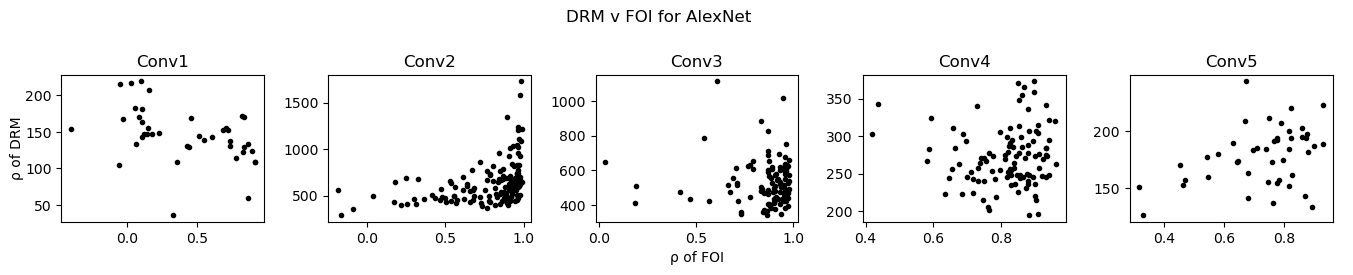

In [35]:
prs_an_drm = {}
for hkey in hkeys:
    prs_an_drm[hkey] = R_an_drm[hkey].std(axis=1) #/ np.absolute(R_an_drm[hkey].mean(axis=1))

fig = plt.figure(figsize=(len(hkeys)*3 - 1, 3))
for i in range(len(hkeys)):
    hkey = hkeys[i]
    ax = fig.add_subplot(1, len(hkeys), i+1)
    ax.plot(prs_an_foi[hkey], prs_an_drm[hkey], "k.")
    ax.set_title(AN_layer[hkey])
vis.common_label(fig, "\u03C1 of FOI", "\u03C1 of DRM")
plt.suptitle("DRM v FOI for AlexNet")
plt.tight_layout(); plt.show()